# **Importing datafiles**

In [41]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/Redbus_Data_Decode Hackathon/train.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Redbus_Data_Decode Hackathon/transactions.csv")

In [42]:
train

,doj,srcid,destid,final_seatcount
0,2023-03-01,45,46,2838.0
1,2023-03-01,46,45,2298.0
2,2023-03-01,45,47,2720.0
3,2023-03-01,47,45,2580.0
4,2023-03-01,46,9,4185.0
...,...,...,...,...
67195,2024-12-31,2,24,800.0
67196,2024-12-31,44,45,1360.0
67197,2024-12-31,47,10,560.0
67198,2024-12-31,38,36,535.0


In [43]:
transactions

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
0,2023-03-01,2023-01-30,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,8.0,76.0,30
1,2023-03-01,2023-01-30,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,8.0,70.0,30
2,2023-03-01,2023-01-30,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,4.0,142.0,30
3,2023-03-01,2023-01-30,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,0.0,68.0,30
4,2023-03-01,2023-01-30,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,162.0,30
...,...,...,...,...,...,...,...,...,...,...,...
2266095,2025-02-28,2025-02-28,2,24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,0.0,0.0,0
2266096,2025-02-28,2025-02-28,44,45,Tamil Nadu,Karnataka,Tier2,Tier 1,0.0,0.0,0
2266097,2025-02-28,2025-02-28,47,10,Andhra Pradesh,Andhra Pradesh,Tier 1,Tier 3,0.0,0.0,0
2266098,2025-02-28,2025-02-28,38,36,Rest of North,Delhi,Tier 1,Tier2,0.0,0.0,0


In [44]:
#check for missing values
train.isnull().sum()

,0
doj,0
srcid,0
destid,0
final_seatcount,0


In [45]:
transactions.isnull().sum()

,0
doj,0
doi,0
srcid,0
destid,0
srcid_region,0
destid_region,0
srcid_tier,0
destid_tier,0
cumsum_seatcount,0
cumsum_searchcount,0


In [46]:
transactions[transactions.isnull().any(axis=1)]

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd


No Missing Values. Hence, data is clean. And we can move forward.

# *Goal: Predict final seat count for a journey 15 days prior to journey.*
This can be viewed as a Time series where we cna model the trend and seasonality. But for extensive analysis of dataset and generate key insights, we need to integrate other important datasets like holidays (national or coorporate world). Marking Saturday, Sundays might be useful as well.


In [47]:
#Find the concerened time duration
print(train['doj'].min())
print(train['doj'].max())

2023-03-01
2024-12-31


Our "Date of Journey" varies from 01/03/2023 to 31/12/2024.

In [48]:
#Find the concerened time duration
print(transactions['doj'].min())
print(transactions['doj'].max())

2023-03-01
2025-02-28


In [49]:
transactions.dtypes

,0
doj,object
doi,object
srcid,int64
destid,int64
srcid_region,object
destid_region,object
srcid_tier,object
destid_tier,object
cumsum_seatcount,float64
cumsum_searchcount,float64


In [50]:
transactions['doj'] = pd.to_datetime(transactions['doj'])

In [51]:
transactions[transactions['doj']> '2024-12-31']

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
2083200,2025-01-01,2024-12-02,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,6.0,626.0,30
2083201,2025-01-01,2024-12-02,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,22.0,620.0,30
2083202,2025-01-01,2024-12-02,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,22.0,1136.0,30
2083203,2025-01-01,2024-12-02,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,70.0,2140.0,30
2083204,2025-01-01,2024-12-02,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,9.0,768.0,30
...,...,...,...,...,...,...,...,...,...,...,...
2266095,2025-02-28,2025-02-28,2,24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,0.0,0.0,0
2266096,2025-02-28,2025-02-28,44,45,Tamil Nadu,Karnataka,Tier2,Tier 1,0.0,0.0,0
2266097,2025-02-28,2025-02-28,47,10,Andhra Pradesh,Andhra Pradesh,Tier 1,Tier 3,0.0,0.0,0
2266098,2025-02-28,2025-02-28,38,36,Rest of North,Delhi,Tier 1,Tier2,0.0,0.0,0


In [52]:
transactions[transactions['cumsum_seatcount'] == 0]

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd
3,2023-03-01,2023-01-30,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,0.0,68.0,30
5,2023-03-01,2023-01-30,9,46,Tamil Nadu,Tamil Nadu,Tier2,Tier 1,0.0,63.0,30
6,2023-03-01,2023-01-30,46,48,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,0.0,309.0,30
7,2023-03-01,2023-01-30,48,46,Tamil Nadu,Tamil Nadu,Tier2,Tier 1,0.0,165.0,30
9,2023-03-01,2023-01-30,9,45,Tamil Nadu,Karnataka,Tier2,Tier 1,0.0,39.0,30
...,...,...,...,...,...,...,...,...,...,...,...
2266095,2025-02-28,2025-02-28,2,24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,0.0,0.0,0
2266096,2025-02-28,2025-02-28,44,45,Tamil Nadu,Karnataka,Tier2,Tier 1,0.0,0.0,0
2266097,2025-02-28,2025-02-28,47,10,Andhra Pradesh,Andhra Pradesh,Tier 1,Tier 3,0.0,0.0,0
2266098,2025-02-28,2025-02-28,38,36,Rest of North,Delhi,Tier 1,Tier2,0.0,0.0,0


This clears my doubt that if cum_seatcount =0 a part of actual dataset or it has been added for all dates which are not their in train.csv.

As we need to complete the predictions 15 days prior to "doj". Hence, we only keep rows in "transactions" dataset where "dbd"=15. also, we don't care muck to take values for "dbd">15. Because we have cumulative count of seat count and search count.

In [53]:
transactions_15 = transactions[transactions['dbd'] == 15].copy()

In [54]:
# Check for duplicates in transactions filtered at dbd = 15
duplicates = transactions_15.duplicated(subset=['doj', 'srcid', 'destid'])

# Print any duplicates
print(transactions_15[duplicates])

Empty DataFrame
Columns: [doj, doi, srcid, destid, srcid_region, destid_region, srcid_tier, destid_tier, cumsum_seatcount, cumsum_searchcount, dbd]
Index: []


So this has only unique values for 'doj','srcid','destid'.

In [55]:
train['doj']=pd.to_datetime(train['doj'])

In [56]:
train_data = transactions_15.merge(train, on=['doj', 'srcid', 'destid'], how='inner')

In [57]:
train_data

,doj,doi,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,dbd,final_seatcount
0,2023-03-01,2023-02-14,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,16.0,480.0,15,2838.0
1,2023-03-01,2023-02-14,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,34.0,352.0,15,2298.0
2,2023-03-01,2023-02-14,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,36.0,892.0,15,2720.0
3,2023-03-01,2023-02-14,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,18.0,1130.0,15,2580.0
4,2023-03-01,2023-02-14,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,48.0,1023.0,15,4185.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67195,2024-12-31,2024-12-16,2,24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,20.0,1300.0,15,800.0
67196,2024-12-31,2024-12-16,44,45,Tamil Nadu,Karnataka,Tier2,Tier 1,75.0,1220.0,15,1360.0
67197,2024-12-31,2024-12-16,47,10,Andhra Pradesh,Andhra Pradesh,Tier 1,Tier 3,15.0,1560.0,15,560.0
67198,2024-12-31,2024-12-16,38,36,Rest of North,Delhi,Tier 1,Tier2,0.0,340.0,15,535.0


As we have already fixed "dbd" =15, this column carries no additional information. Also, "doi" is simply "doj"- 15.So, this also has no additional information.

In [58]:
train_data.drop(columns=['dbd','doi'],inplace=True)

In [59]:
train_data['day_of_week'] = train_data['doj'].dt.dayofweek

In [60]:
train_data

,doj,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,final_seatcount,day_of_week
0,2023-03-01,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,16.0,480.0,2838.0,2
1,2023-03-01,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,34.0,352.0,2298.0,2
2,2023-03-01,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,36.0,892.0,2720.0,2
3,2023-03-01,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,18.0,1130.0,2580.0,2
4,2023-03-01,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,48.0,1023.0,4185.0,2
...,...,...,...,...,...,...,...,...,...,...,...
67195,2024-12-31,2,24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,20.0,1300.0,800.0,1
67196,2024-12-31,44,45,Tamil Nadu,Karnataka,Tier2,Tier 1,75.0,1220.0,1360.0,1
67197,2024-12-31,47,10,Andhra Pradesh,Andhra Pradesh,Tier 1,Tier 3,15.0,1560.0,560.0,1
67198,2024-12-31,38,36,Rest of North,Delhi,Tier 1,Tier2,0.0,340.0,535.0,1


Now, final_seatcount can deepend on the features in different ways:

a) "cum_searchcount" essentially shows the interest in any journey 15 days prior to "doj".

b) Tier of city might also influence our prediction. This is because Tier 1 residents book their tickets in advance but it is not the same for Tier 2 and Tier 3 cities.

c) Also , a particular route might be busy as compared to others.

d) Region of Source city and destination city can also impact our predictions.

e)Day_of_week might also imapct our prediction. Because people are generally free on weekends and might have their travel plans which will reflect on our predictions.

These are all my initial speculations about how these features can imapct our prediction.
These claims will be confirmed by Heatmap and EDA.

In [61]:
import matplotlib.pyplot as plt

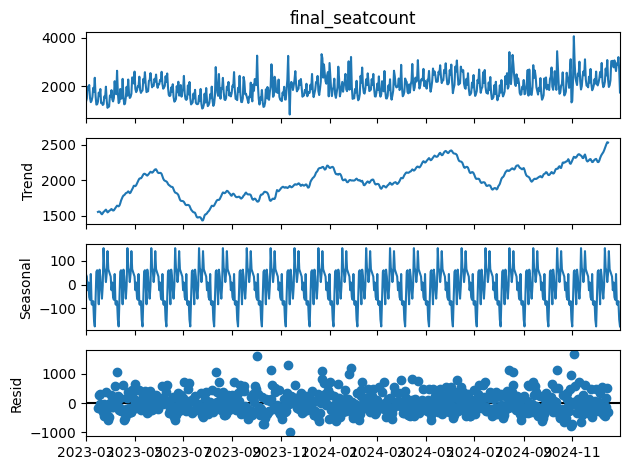

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assume daily frequency
train_daily = train.groupby('doj')['final_seatcount'].mean().reset_index()
train_daily = train_daily.set_index('doj')

result = seasonal_decompose(train_daily['final_seatcount'], model='additive', period=30)

result.plot()
plt.show()

This Time Series Decomposition plot clearly shows that our datset have Seasonality. A pattern repeats

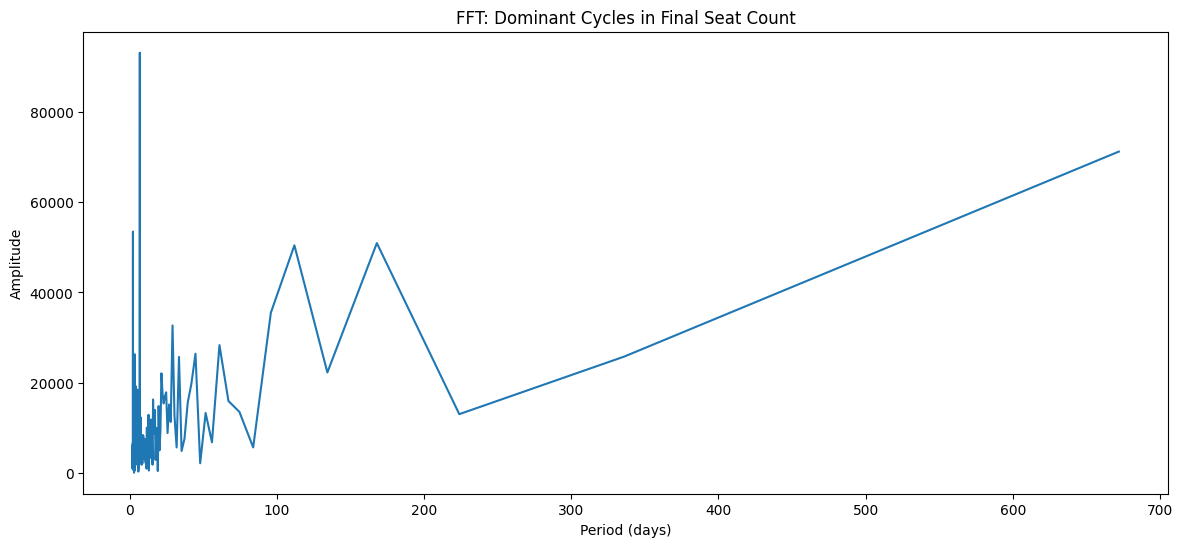

In [63]:
import numpy as np
from scipy.fft import fft

# Remove NaNs if any
series = train_daily['final_seatcount'].dropna()

# Apply FFT
fft_values = fft(series)
frequencies = np.fft.fftfreq(len(fft_values))

# Find dominant frequency
positive_freqs = frequencies[frequencies > 0]
positive_fft_values = np.abs(fft_values[frequencies > 0])

# Plot
plt.figure(figsize=(14,6))
plt.plot(1 / positive_freqs, positive_fft_values)
plt.xlabel('Period (days)')
plt.ylabel('Amplitude')
plt.title('FFT: Dominant Cycles in Final Seat Count')
plt.show()

This Fast Fourier Transform (FFT) suggests that this is semi-annual trend.  

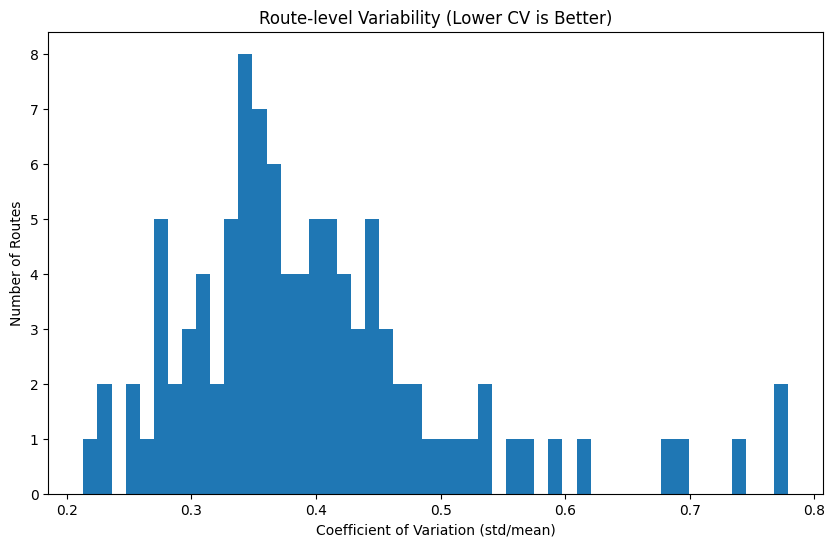

In [64]:
# Group by route and compute mean and std
route_stats = train.groupby(['srcid', 'destid'])['final_seatcount'].agg(['mean', 'std', 'count']).reset_index()

# Calculate Coefficient of Variation (CV = std/mean)
route_stats['cv'] = route_stats['std'] / route_stats['mean']

# Plot histogram of CVs
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(route_stats['cv'].dropna(), bins=50)
plt.xlabel('Coefficient of Variation (std/mean)')
plt.ylabel('Number of Routes')
plt.title('Route-level Variability (Lower CV is Better)')
plt.show()

In [65]:
route_stats['cv'].max()

0.7788411116018477

In [66]:
route_stats.shape

(100, 6)

In [67]:
route_stats[route_stats['cv']<0.5].shape

(86, 6)

Out of 100 routes, 86 have a CV of below 0.5. This means that we can safely use mean as a baseline prediction for our routes.

In [68]:
# Get route means
route_means = train_data.groupby(['srcid', 'destid'])['final_seatcount'].mean().reset_index()
route_means.rename(columns={'final_seatcount': 'route_mean'}, inplace=True)

# Merge with train data
train_data = train_data.merge(route_means, on=['srcid', 'destid'], how='left')

# Calculate residuals
train_data['residual'] = train_data['final_seatcount'] - train_data['route_mean']

In [69]:
train_data

,doj,srcid,destid,srcid_region,destid_region,srcid_tier,destid_tier,cumsum_seatcount,cumsum_searchcount,final_seatcount,day_of_week,route_mean,residual
0,2023-03-01,45,46,Karnataka,Tamil Nadu,Tier 1,Tier 1,16.0,480.0,2838.0,2,4218.648810,-1380.648810
1,2023-03-01,46,45,Tamil Nadu,Karnataka,Tier 1,Tier 1,34.0,352.0,2298.0,2,4044.571429,-1746.571429
2,2023-03-01,45,47,Karnataka,Andhra Pradesh,Tier 1,Tier 1,36.0,892.0,2720.0,2,4022.431548,-1302.431548
3,2023-03-01,47,45,Andhra Pradesh,Karnataka,Tier 1,Tier 1,18.0,1130.0,2580.0,2,4015.877976,-1435.877976
4,2023-03-01,46,9,Tamil Nadu,Tamil Nadu,Tier 1,Tier2,48.0,1023.0,4185.0,2,4954.995536,-769.995536
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67195,2024-12-31,2,24,Maharashtra and Goa,Maharashtra and Goa,Tier 1,Tier2,20.0,1300.0,800.0,1,1304.196429,-504.196429
67196,2024-12-31,44,45,Tamil Nadu,Karnataka,Tier2,Tier 1,75.0,1220.0,1360.0,1,1292.343750,67.656250
67197,2024-12-31,47,10,Andhra Pradesh,Andhra Pradesh,Tier 1,Tier 3,15.0,1560.0,560.0,1,1203.816964,-643.816964
67198,2024-12-31,38,36,Rest of North,Delhi,Tier 1,Tier2,0.0,340.0,535.0,1,1214.337798,-679.337798


Now, we need to just model the "residuals" for our dataset.

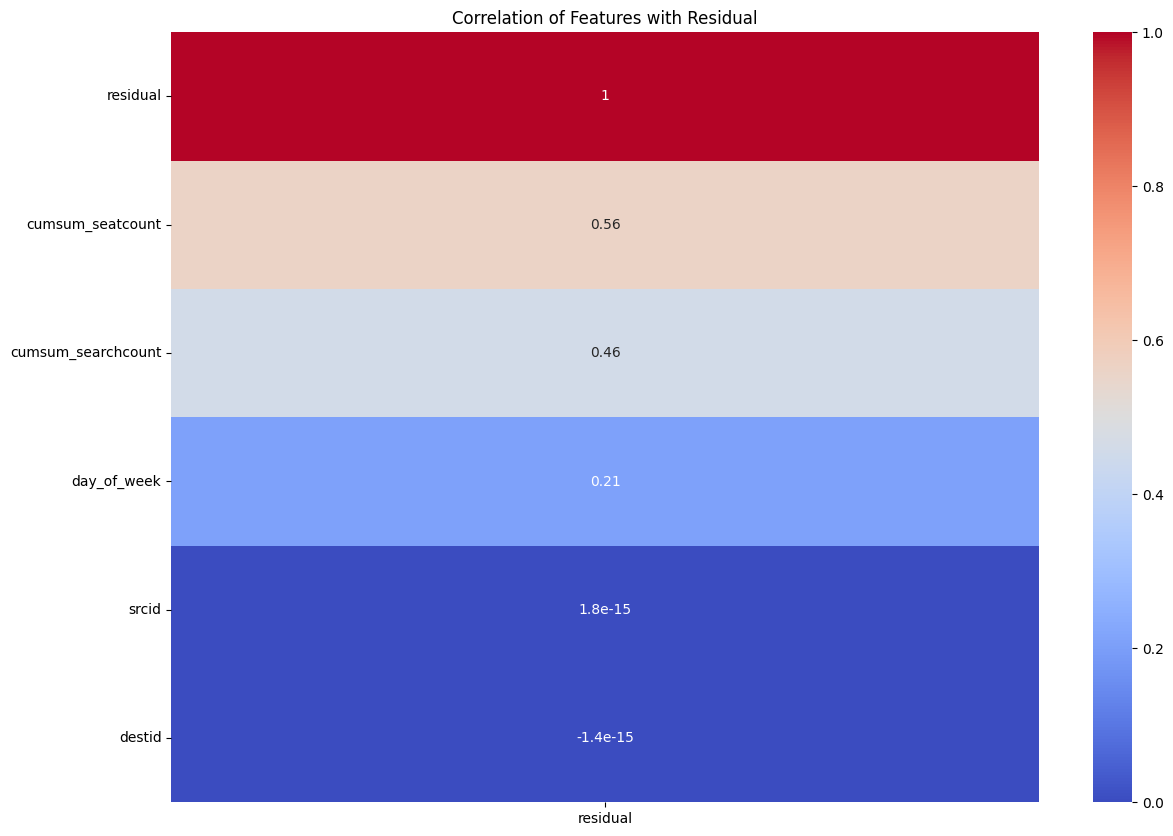

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

exclude_cols = ['final_seatcount', 'route_mean', 'residual', 'doj', 'srcid_region', 'destid_region','srcid_tier','destid_tier']

# Select feature columns
feature_cols = [col for col in train_data.columns if col not in exclude_cols]

# Prepare correlation dataset (features + residual)
correlation_data = train_data[feature_cols + ['residual']]

# Step 4: Calculate correlation matrix
corr_matrix = correlation_data.corr()

# Step 5: Plot heatmap of features vs residual
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix[['residual']].sort_values(by='residual', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Residual')
plt.show()

This heatmap suggests that Source and Destination Cities and their Tier levels has no correlation with residuls. On the other hand, residuals have a strong correlation with day_of_week,cum_seatcount,cum_searchcount.

We will use a model to first predict residuls using the fetures with string correlation and then we might just use LightGBM or XGBoost like Tree-based models for modelling the effect of ither fetures.

# **Modelling**

Importing necessary libraries

In [71]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [72]:
#Calculate sample weights
train_data['weights'] = train_data['final_seatcount'] / train_data['final_seatcount'].max()

**Log Transformation**

In [73]:
min_residual = train_data['residual'].min()
shift_value = 1 - min_residual if min_residual <= 0 else 0

train_data['shifted_residual'] = train_data['residual'] + shift_value
train_data['log_residual'] = np.log1p(train_data['shifted_residual'])

In [74]:
#Define categorical cols
categorical_cols = ['srcid_region', 'destid_region', 'srcid_tier', 'destid_tier']
label_encoders = {}

In [75]:
for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    label_encoders[col] = le

In [76]:
exclude_cols = ['final_seatcount', 'route_mean', 'doj', 'srcid', 'destid', 'residual', 'shifted_residual', 'log_residual']
feature_cols = [col for col in train_data.columns if col not in exclude_cols]

In [77]:
feature_cols

['srcid_region',
 'destid_region',
 'srcid_tier',
 'destid_tier',
 'cumsum_seatcount',
 'cumsum_searchcount',
 'day_of_week',
 'weights']

In [79]:
# Define the split index for training and validation data
split_index = int(len(train_data) * 0.8) # Using 80% for training

In [80]:
#Preparing training and validation data
X_train = train_data.iloc[:split_index][feature_cols]
y_train = train_data.iloc[:split_index]['log_residual']
weights_train = train_data.iloc[:split_index]['weights']

X_val = train_data.iloc[split_index:][feature_cols]
y_val = train_data.iloc[split_index:]['log_residual']
weights_val = train_data.iloc[split_index:]['weights']

In [81]:
model = lgb.LGBMRegressor(
    objective='regression',
    learning_rate=0.05,
    num_leaves=31,
    random_state=42,
    n_estimators=1000
)

In [82]:
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    sample_weight=weights_train,
    categorical_feature=categorical_cols,
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 53760, number of used features: 8
[LightGBM] [Info] Start training from score 8.249976
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[991]	valid_0's rmse: 0.105259	valid_0's l2: 0.0110794


LGBMRegressor(learning_rate=0.05, n_estimators=1000, objective='regression',
              random_state=42)

In [83]:
y_val_pred_log = model.predict(X_val, num_iteration=model.best_iteration_)
y_val_pred_shifted = np.expm1(y_val_pred_log)
y_val_pred_residual = y_val_pred_shifted - shift_value

y_val_route_mean = train_data.iloc[split_index:]['route_mean']
y_val_final_pred = y_val_route_mean + y_val_pred_residual

In [84]:
rmse = np.sqrt(mean_squared_error(train_data.iloc[split_index:]['final_seatcount'], y_val_final_pred))
print(f'Validation RMSE (Weighted Loss): {rmse:.4f}')

Validation RMSE (Weighted Loss): 309.5865


# **Hyperparameter Tuning**

In [85]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 16.9 MB/s eta 0:00:00


In [86]:
import optuna
from sklearn.metrics import mean_squared_error

#  Define the Objective Function for Optuna
def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 15, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 5.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 5.0),
        'random_state': 42,
        'verbosity': -1
    }

    model = lgb.LGBMRegressor(**params, n_estimators=1000)

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
        sample_weight=weights_train,
        categorical_feature=categorical_cols,
        callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]
    )

    y_val_pred_log = model.predict(X_val, num_iteration=model.best_iteration_)
    y_val_pred_shifted = np.expm1(y_val_pred_log)
    y_val_pred_residual = y_val_pred_shifted - shift_value
    y_val_route_mean = train_data.iloc[split_index:]['route_mean']
    y_val_final_pred = y_val_route_mean + y_val_pred_residual

    rmse = mean_squared_error(train_data.iloc[split_index:]['final_seatcount'], y_val_final_pred)
    return rmse

#  Run the Optuna Study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

#  Best Hyperparameters
print('Best trial:')
print(f'  RMSE: {study.best_value}')
print('  Params: ')
for key, value in study.best_params.items():
    print(f'    {key}: {value}')

[I 2025-06-21 18:51:37,331] A new study created in memory with name: no-name-932ca978-6d1c-4696-acb5-5d0fb7f3f3aa
[I 2025-06-21 18:51:38,871] Trial 0 finished with value: 178607.0409681992 and parameters: {'learning_rate': 0.1894877176952762, 'num_leaves': 72, 'min_child_samples': 23, 'feature_fraction': 0.502761011562525, 'bagging_fraction': 0.7209838104837247, 'bagging_freq': 6, 'lambda_l1': 4.442619937171479, 'lambda_l2': 1.6440349083218875}. Best is trial 0 with value: 178607.0409681992.
[I 2025-06-21 18:51:59,631] Trial 1 finished with value: 95618.84104755202 and parameters: {'learning_rate': 0.08542054772160058, 'num_leaves': 34, 'min_child_samples': 19, 'feature_fraction': 0.5131560552430323, 'bagging_fraction': 0.9250008470982055, 'bagging_freq': 7, 'lambda_l1': 0.19827883313398187, 'lambda_l2': 4.826475539086109}. Best is trial 1 with value: 95618.84104755202.
[I 2025-06-21 18:52:04,555] Trial 2 finished with value: 152728.05983113745 and parameters: {'learning_rate': 0.19758

Best trial:
  RMSE: 93158.8898498829
  Params: 
    learning_rate: 0.1285690285303475
    num_leaves: 54
    min_child_samples: 38
    feature_fraction: 0.6061341882901093
    bagging_fraction: 0.8592799105025559
    bagging_freq: 4
    lambda_l1: 0.25015685159228473
    lambda_l2: 2.689679111296181


# **Modified Model**

In [87]:
#  Retrain Model on Full Dataset with Best Params
best_params = study.best_params
best_params['objective'] = 'regression'
best_params['random_state'] = 42

full_X = train_data[feature_cols]
full_y = train_data['log_residual']
full_weights = train_data['weights']

final_model = lgb.LGBMRegressor(**best_params, n_estimators=1000)

final_model.fit(
    full_X, full_y,
    sample_weight=full_weights,
    categorical_feature=categorical_cols,
)

LGBMRegressor(bagging_fraction=0.8592799105025559, bagging_freq=4,
              feature_fraction=0.6061341882901093,
              lambda_l1=0.25015685159228473, lambda_l2=2.689679111296181,
              learning_rate=0.1285690285303475, min_child_samples=38,
              n_estimators=1000, num_leaves=54, objective='regression',
              random_state=42)

# **Testing with Test Data**

In [88]:
test_data = pd.read_csv("/content/drive/MyDrive/Redbus_Data_Decode Hackathon/test_8gqdJqH.csv")
sample_submissions = pd.read_csv("/content/drive/MyDrive/Redbus_Data_Decode Hackathon/sample_submission_TQv3O0x.csv")

In [89]:
# Build city mapping from train_data
src_city_mapping = train_data[['srcid', 'srcid_region', 'srcid_tier']].drop_duplicates()
dest_city_mapping = train_data[['destid', 'destid_region', 'destid_tier']].drop_duplicates()

In [90]:
# Merge source city info
test_data = test_data.merge(src_city_mapping, on='srcid', how='left')

# Merge destination city info
test_data = test_data.merge(dest_city_mapping, on='destid', how='left')

In [91]:
print(test_data.isnull().sum())

route_key        0
doj              0
srcid            0
destid           0
srcid_region     0
srcid_tier       0
destid_region    0
destid_tier      0
dtype: int64


In [92]:
test_data['doj'] = pd.to_datetime(test_data['doj'])
test_data['day_of_week'] = test_data['doj'].dt.dayofweek

In [93]:
test_data = test_data.merge(route_means, on=['srcid', 'destid'], how='left')

In [95]:
from sklearn.preprocessing import OrdinalEncoder

# Example: Create encoders for each categorical column
ordinal_encoders = {}

for col in categorical_cols:
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    train_data[[col]] = oe.fit_transform(train_data[[col]])
    ordinal_encoders[col] = oe

# Apply the same encoders to test data
for col in categorical_cols:
    test_data[[col]] = ordinal_encoders[col].transform(test_data[[col]])

In [96]:
feature_cols

['srcid_region',
 'destid_region',
 'srcid_tier',
 'destid_tier',
 'cumsum_seatcount',
 'cumsum_searchcount',
 'day_of_week',
 'weights']

In [101]:
test_data.columns

Index(['route_key', 'doj', 'srcid', 'destid', 'srcid_region', 'srcid_tier',
       'destid_region', 'destid_tier', 'day_of_week', 'route_mean',
       'cumsum_seatcount', 'cumsum_searchcount'],
      dtype='object')

In [100]:
test_data = test_data.merge(
    transactions_15[['srcid', 'destid', 'doj', 'cumsum_seatcount', 'cumsum_searchcount']],
    on=['srcid', 'destid', 'doj'], how='left'
)

In [104]:
# Calculate weights (same as training, using route_mean as proxy)
max_seatcount_train = train_data['final_seatcount'].max()
test_data['weights'] = test_data['route_mean'] / max_seatcount_train

In [105]:
test_features = test_data[feature_cols]

In [106]:
test_pred_log = final_model.predict(test_features, num_iteration=final_model.best_iteration_)
test_pred_shifted = np.expm1(test_pred_log)
test_pred_residual = test_pred_shifted - shift_value

In [107]:
test_data['final_seatcount'] = test_data['route_mean'] + test_pred_residual

In [108]:
submission = sample_submissions.copy()
submission = submission.merge(test_data[['route_key', 'final_seatcount']], on='route_key', how='left')

In [109]:
submission.to_csv('final_submission.csv', index=False)
print('Final submission file created successfully: final_submission.csv')

Final submission file created successfully: final_submission.csv
